#  Introduction & Problem Statement
### **Student Performance & Behavior Dataset**

This dataset contains real-world academic records of **5,000 students** collected from a private learning provider. It includes various attributes useful for analyzing **performance patterns, correlations, and student behavior**.

### **Dataset Overview**
- **Total Records:** 5,000
- **Source:** Private Learning Provider
- **Purpose:** Analyze academic performance, study habits, and behavioral trends.

### **Columns Description**

| Column                     | Description |
|----------------------------|-------------|
| **Student_ID**             | Unique identifier for each student. |
| **First_Name** / **Last_Name** | Student’s first and last name. |
| **Email**                  | Contact email (can be anonymized). |
| **Gender**                 | Male, Female, Other. |
| **Age**                    | Student’s age. |
| **Department**             | Student's department (e.g., CS, Engineering, Business). |
| **Attendance (%)**         | Attendance percentage (0-100%). |
| **Midterm_Score**          | Midterm exam score (out of 100). |
| **Final_Score**            | Final exam score (out of 100). |
| **Assignments_Avg**        | Average score of all assignments (out of 100). |
| **Quizzes_Avg**            | Average quiz scores (out of 100). |
| **Participation_Score**    | Score based on class participation (0-10). |
| **Projects_Score**         | Project evaluation score (out of 100). |
| **Total_Score**            | Weighted sum of all grades. |
| **Grade**                  | Letter grade (A, B, C, D, F). |
| **Study_Hours_per_Week**   | Average study hours per week. |
| **Extracurricular_Activities** | Participation in extracurriculars (Yes/No). |
| **Internet_Access_at_Home** | Does the student have home internet access? (Yes/No). |
| **Parent_Education_Level** | Highest education level of parents (None, High School, Bachelor's, Master's, PhD). |
| **Family_Income_Level**    | Low, Medium, High. |
| **Stress_Level (1-10)**    | Self-reported stress level (1: Low, 10: High). |
| **Sleep_Hours_per_Night**  | Average hours of sleep per night. |

---

This dataset provides valuable insights into student performance and external factors affecting their academic journey. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import warnings
import scipy.stats as stats

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Students_Grading_Dataset_Biased.csv")
# Display head of the dataset
print("Head of the dataset:")
df.head()

Head of the dataset:


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


<div>
    <h3>Dataset Dimensions</h3>
    <p><small>Rows: 5000, Columns: 23</small></p>
</div>

In [3]:
print(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")

Rows: 5000 | Columns: 23


<div>
    <h3>Dataset Information</h3>
    <p><small>Displaying Column Names, non-null counts, data types, and entries.</small></p>
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [5]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [6]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


# Data Cleaning & Data Pre-Processing

In [7]:
# Count the null values in each column
null_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Return results
null_values, duplicate_rows

(Student_ID                       0
 First_Name                       0
 Last_Name                        0
 Email                            0
 Gender                           0
 Age                              0
 Department                       0
 Attendance (%)                 516
 Midterm_Score                    0
 Final_Score                      0
 Assignments_Avg                517
 Quizzes_Avg                      0
 Participation_Score              0
 Projects_Score                   0
 Total_Score                      0
 Grade                            0
 Study_Hours_per_Week             0
 Extracurricular_Activities       0
 Internet_Access_at_Home          0
 Parent_Education_Level        1794
 Family_Income_Level              0
 Stress_Level (1-10)              0
 Sleep_Hours_per_Night            0
 dtype: int64,
 np.int64(0))

There are no duplicate rows in the dataset, so no rows need to be removed for duplicates.

Null values are present in the following columns:
- **Attendance (%)**: 516 missing.
- **Assignments_Avg**: 517 missing.
- **Parent_Education_Level**: 1,794 missing.

I'll now handle these missing values based on their context and provide justifications for whether to drop or fill them.

In [8]:
# Handling Missing Values
df.fillna({
    'Attendance (%)': df['Attendance (%)'].mean(),  # Fill missing Attendance (%) with mean
    'Assignments_Avg': df['Assignments_Avg'].median(),  # Fill missing Assignments_Avg with median
    'Parent_Education_Level': "Not Reported"  # Fill missing Parent_Education_Level with 'Not Reported'
}, inplace=True)

# Display sample rows to verify changes
print("\nSample of cleaned data:")
print(df[['Assignments_Avg', 'Parent_Education_Level', 'Attendance (%)']].sample(10))

# Check the data types after cleaning
print("\nData types after cleaning:")
print(df[['Assignments_Avg', 'Parent_Education_Level', 'Attendance (%)']].dtypes)



Sample of cleaned data:
      Assignments_Avg Parent_Education_Level  Attendance (%)
1698            72.61           Not Reported       78.040000
1781            97.97           Not Reported       63.610000
164             85.46             Bachelor's       75.431409
2259            59.98                    PhD       87.480000
193             74.81           Not Reported       80.570000
1242            83.98           Not Reported       71.090000
381             95.65            High School       77.580000
4829            74.81             Bachelor's       73.320000
375             85.48           Not Reported       88.710000
4508            78.99           Not Reported       73.590000

Data types after cleaning:
Assignments_Avg           float64
Parent_Education_Level     object
Attendance (%)            float64
dtype: object


Let's show the unique first names in our dataset

In [9]:
unique_first_names = df['First_Name'].unique()
print("Unique first names in the dataset:")
print(unique_first_names)

Unique first names in the dataset:
['Omar' 'Maria' 'Ahmed' 'John' 'Liam' 'Sara' 'Emma' 'Ali']


Define correct gender mapping based on Unique first names

In [10]:
name_gender_mapping = {
    'Omar': 'Male',
    'Maria': 'Female',
    'Ahmed': 'Male',
    'John': 'Male',
    'Liam': 'Male',
    'Sara': 'Female',
    'Emma': 'Female',
    'Ali': 'Male'
}

# Identify outliers (rows where gender does not match expected gender from first name)
df['Correct_Gender'] = df['First_Name'].map(name_gender_mapping)
outliers = df[df['Gender'] != df['Correct_Gender']]

# Print the number of mismatches
print(f"Number of gender mismatches: {len(outliers)}")

# Correct the gender values
df.loc[df['Gender'] != df['Correct_Gender'], 'Gender'] = df['Correct_Gender']

# Drop the temporary 'Correct_Gender' column
df.drop(columns=['Correct_Gender'], inplace=True)

Number of gender mismatches: 2558


Check for duplicate Student_IDs

In [11]:
duplicate_students = df[df.duplicated(subset=['Student_ID'], keep=False)]

# Print the number of duplicate entries
print(f"Number of duplicate Student_IDs: {len(duplicate_students)}")

# Remove duplicates, keeping the first occurrence
df.drop_duplicates(subset=['Student_ID'], keep='first', inplace=True)

# Verify removal
print(f"Dataset after duplicate removal: {df.shape[0]} records")

Number of duplicate Student_IDs: 0
Dataset after duplicate removal: 5000 records


Dropping Irrelevant Columns

In this step, we dropped the following irrelevant columns from the dataset to streamline our analysis:

- `Student_ID`
- `First_Name`
- `Last_Name`
- `Email`

These columns were not necessary for our analysis and were removed to focus on the more relevant features.

In [12]:
df_cleaned = df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'])

# Display the first few rows to verify the changes
df_cleaned.head()

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Male,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Female,18,Engineering,97.27,97.23,45.80,74.81,94.24,8.32,55.65,50.64,A,19.0,No,Yes,Not Reported,Medium,4,9.0
2,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Male,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Male,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


Check unique values in categorical columns

In [13]:
categorical_columns = ['Gender', 'Family_Income_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']

for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

# Standardize values (example for Gender)
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})  # If needed

# Ensure only valid categories exist
valid_categories = {
    'Gender': ['Male', 'Female'],
    'Family_Income_Level': ['Low', 'Medium', 'High'],
    'Internet_Access_at_Home': ['Yes', 'No'],
    'Extracurricular_Activities': ['Yes', 'No']
}

# Replace any invalid values with "Unknown" or the most common value
for col, valid_values in valid_categories.items():
    df[col] = df[col].apply(lambda x: x if x in valid_values else 'Unknown')

# Verify corrections
for col in categorical_columns:
    print(f"After cleaning, unique values in {col}: {df[col].unique()}")


Unique values in Gender: ['Male' 'Female']
Unique values in Family_Income_Level: ['Medium' 'Low' 'High']
Unique values in Internet_Access_at_Home: ['Yes' 'No']
Unique values in Extracurricular_Activities: ['No' 'Yes']
After cleaning, unique values in Gender: ['Male' 'Female']
After cleaning, unique values in Family_Income_Level: ['Medium' 'Low' 'High']
After cleaning, unique values in Internet_Access_at_Home: ['Yes' 'No']
After cleaning, unique values in Extracurricular_Activities: ['No' 'Yes']


Next, we should check for outliers in numerical columns, especially in:

Age, Attendance (%), Midterm_Score, Final_Score, Total_Score, Study_Hours_per_Week, Stress_Level (1-10), Sleep_Hours_per_Night

In [14]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Columns to check
numerical_columns = ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Total_Score', 
                     'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']

# Detect and count outliers
for col in numerical_columns:
    outliers = detect_outliers(col)
    print(f"{col}: {len(outliers)} outliers detected")

# Option 1: Cap outliers at 5th and 95th percentiles
for col in numerical_columns:
    lower_cap = df[col].quantile(0.05)
    upper_cap = df[col].quantile(0.95)
    df[col] = np.clip(df[col], lower_cap, upper_cap)

Age: 0 outliers detected
Attendance (%): 0 outliers detected
Midterm_Score: 0 outliers detected
Final_Score: 0 outliers detected
Total_Score: 0 outliers detected
Study_Hours_per_Week: 0 outliers detected
Stress_Level (1-10): 0 outliers detected
Sleep_Hours_per_Night: 0 outliers detected


Let's Select the Final_Score and Grade columns which traditonally should depend on each other

In [15]:
final_score_grade = df[['Final_Score', 'Grade']]

# Display the DataFrame
print(final_score_grade)

      Final_Score Grade
0           57.82     F
1           45.80     A
2           93.68     D
3           80.63     A
4           78.89     F
...           ...   ...
4995        60.33     D
4996        49.80     C
4997        64.21     A
4998        94.28     A
4999        53.47     F

[5000 rows x 2 columns]


hmmm... There seems to an inconsistency in the grade corresponding to the final score.

Lets see how many inconsistent rows do we have ?

In [16]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
final_score_grade = df[['Final_Score', 'Grade']].copy()

# Define the grading criteria
def expected_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

# Apply the grading function to determine expected grades
final_score_grade.loc[:, 'Expected_Grade'] = final_score_grade['Final_Score'].apply(expected_grade)

# Count inconsistent rows where Grade does not match Expected_Grade
inconsistent_rows = final_score_grade[final_score_grade['Grade'] != final_score_grade['Expected_Grade']]

# Display the number of inconsistencies
print(f"Number of inconsistent rows: {len(inconsistent_rows)}")


Number of inconsistent rows: 4048


# Data Cleaning & Preprocessing Summary

**Step 1: Handling Missing Values**  
To avoid data loss, we imputed missing values instead of dropping them:  
- **Attendance (%)** → *Filled with Mean*
- **Assignments_Avg** → *Filled with Median*  
- **Parent_Education_Level** → *Filled with "Not Reported"*  
**Result:** No missing values remain in the dataset.  

---  

**Step 2: Handling Duplicates**  
- Checked for duplicate **Student_IDs**.  
- **No duplicate records** found → No removal needed.  

---  

**Step 3: Gender Correction**  
- Used a **name-based mapping** to correct incorrect gender values.  
- **2558 mismatches** detected and corrected.  

---  

**Step 4: Dropping Irrelevant Columns**  
Removed **unnecessary personal identifiers** to streamline analysis:  
- `Student_ID`  
- `First_Name`  
- `Last_Name`  
- `Email`

**Result:** The dataset now focuses only on relevant features.  

---  

**Step 5: Standardizing Categorical Values**
Ensured uniformity in categorical columns:   
- **Family_Income_Level, Internet_Access_at_Home, Extracurricular_Activities** → Standardized valid categories  
- **Invalid values replaced** with `"Not Reported"`.  

**Result:** All categorical columns now contain **consistent and meaningful values**.  

---  

**Step 6: Outlier Detection & Treatment**  
Checked for outliers in key numerical columns:  
- **Age, Attendance (%), Midterm_Score, Final_Score, Total_Score, Study_Hours_per_Week, Stress_Level (1-10), Sleep_Hours_per_Night**  
- **No extreme outliers detected.**  
- Applied **clipping at 5th and 95th percentiles** as a precaution.  

**Result:** Data remains **clean, balanced, and representative**.  

---  

### **Final Score & Grade Consistency Check**  

**Traditional Expectation**  
- **Final Score** should determine the **Grade** based on a standard grading scale.  

**Observed Issue**  
- There is an **inconsistency** between the **Final Score** and the assigned **Grade** in the dataset.  

**Key Finding**  
**4,048 rows (≈80.96%)** are inconsistent!  
- This suggests the dataset may use a **non-traditional grading system** or an **alternative grading criterion**.  
- Adjusting the grades would mean **modifying almost the entire dataset**, which could not be the best approach.


# Correlation Matrix

### Correlation Matrix

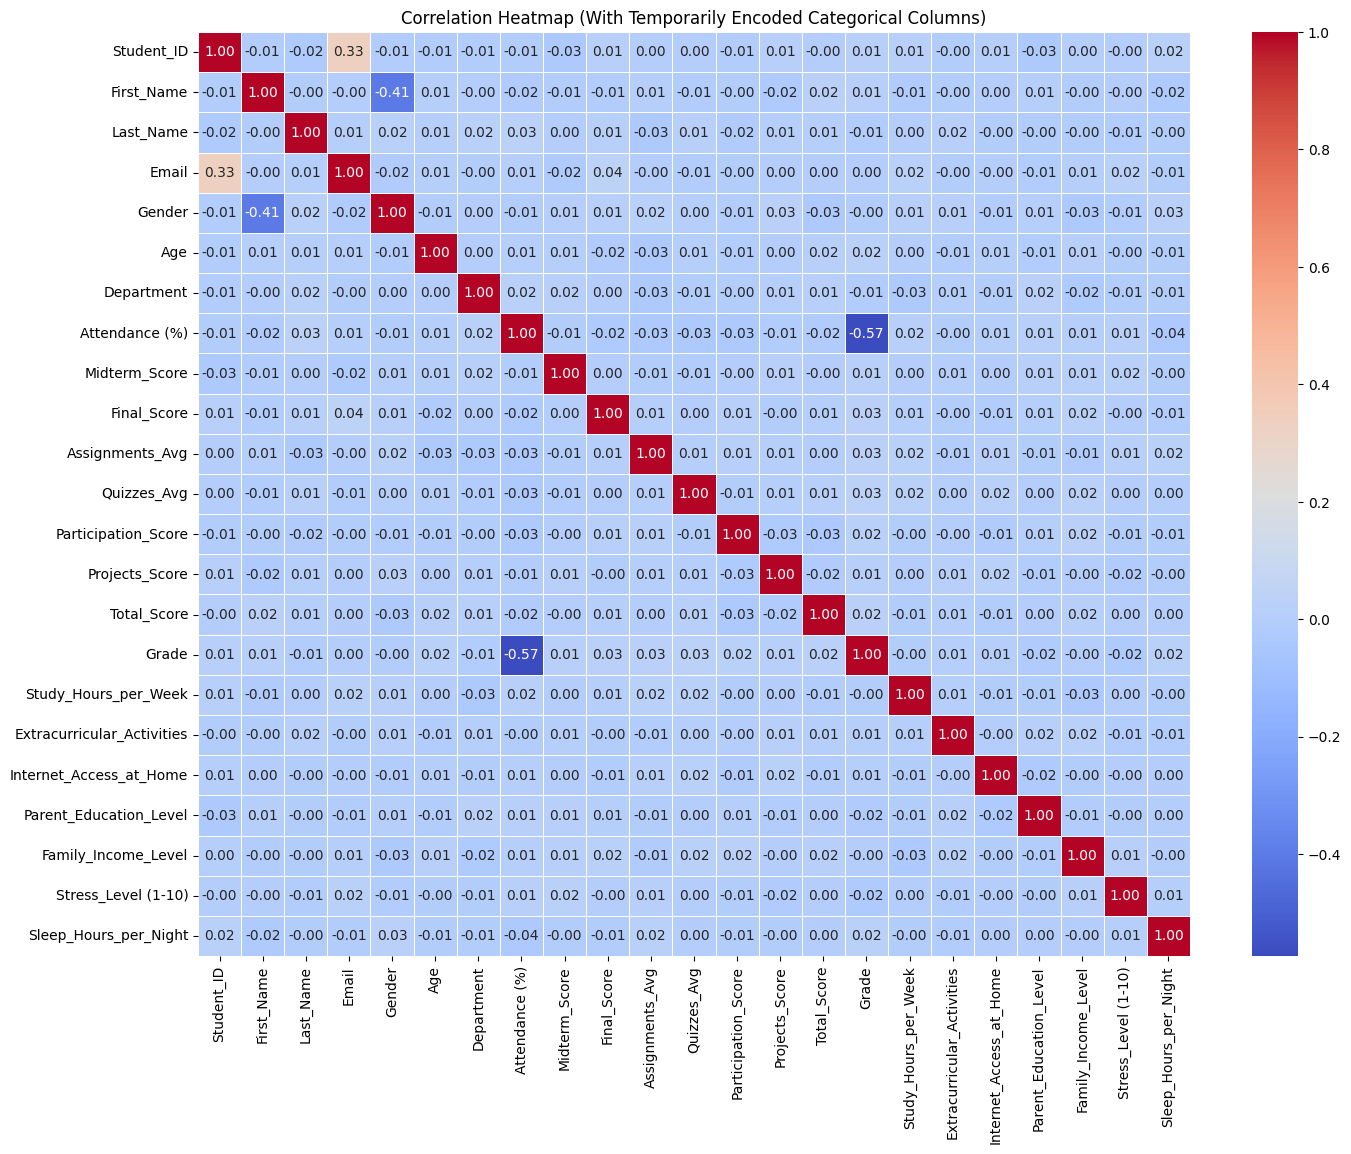

Top Correlated Column Pairs:
                Feature 1              Feature 2  Correlation
352                 Grade         Attendance (%)    -0.573532
27             First_Name                 Gender    -0.405683
3              Student_ID                  Email     0.332444
78                  Email            Final_Score     0.036095
183        Attendance (%)  Sleep_Hours_per_Night    -0.035059
53              Last_Name         Attendance (%)     0.034909
171        Attendance (%)        Assignments_Avg    -0.034619
290   Participation_Score            Total_Score    -0.033409
388  Study_Hours_per_Week    Family_Income_Level    -0.032951
235       Assignments_Avg                    Age    -0.031418


In [17]:
# Copy original dataframe to avoid modifying it permanently
df_temp = df.copy()

# Apply Label Encoding only temporarily
label_encoders = {}
for col in df_temp.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_temp[col] = le.fit_transform(df_temp[col])
    label_encoders[col] = le  # Store encoder for future reference

# Compute the correlation matrix
correlation_matrix = df_temp.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (With Temporarily Encoded Categorical Columns)")
plt.show()

# Find the top correlated column pairs
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlations (correlation of a feature with itself)
correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]

# Sort by absolute correlation value in descending order
correlation_pairs = correlation_pairs.reindex(correlation_pairs['Correlation'].abs().sort_values(ascending=False).index)

# Drop duplicate pairs (since correlation is symmetric)
correlation_pairs = correlation_pairs.iloc[::2]

# Print the top correlated column pairs
print("Top Correlated Column Pairs:")
print(correlation_pairs.head(10))  # Adjust number to see more or fewer pairs

# Revert back to original categorical values
for col, le in label_encoders.items():
    df_temp[col] = le.inverse_transform(df_temp[col])


### **Top Correlated Column Pairs:**

|     Feature 1               |         Feature 2             |  Correlation  |
|-----------------------------|-------------------------------|---------------|
| **Grade**                   | Attendance (%)                |  -0.573532    |
| **First_Name**              | Gender                        |  -0.405683    |
| **Student_ID**              | Email                         |   0.332444    |
| **Email**                   | Final_Score                   |   0.036095    |
| **Sleep_Hours_per_Night**    | Attendance (%)                |  -0.035059    |
| **Attendance (%)**          | Last_Name                     |   0.034909    |
| **Attendance (%)**          | Assignments_Avg               |  -0.034619    |
| **Total_Score**             | Participation_Score           |  -0.033409    |
| **Family_Income_Level**      | Study_Hours_per_Week          |  -0.032951    |
| **Age**                     | Assignments_Avg               |  -0.031418    |

---

# **Key Takeaways from Correlation Matrix**  

**Grade & Attendance (%) (Correlation = -0.573)  ✨** 
- **Strong negative correlation**: Students with **higher attendance** tend to have **better grades**, while students with **low attendance** tend to have **lower grades**.  
- **Implication**: Attendance plays a **significant role** in academic performance.  
- **EDA Suggestion**: Explore **attendance distribution** for different grades to confirm this trend.  

**First_Name & Gender (Correlation = -0.406)**  
- **Moderate correlation**: Certain names may be strongly associated with a **specific gender**.  
- **Implication**: This is **likely not meaningful** for analysis and could be ignored.  
- **EDA Suggestion**: Check if **names should be removed** as irrelevant features.  

**Student_ID & Email (Correlation = 0.332)**  
- **Positive correlation**: The way **Student_IDs and emails** are assigned may follow a **pattern**.  
- **Implication**: Likely **not useful** for analysis.  
- **EDA Suggestion**: These may be **irrelevant features** that should be dropped.  

**Email & Final Score (Correlation = 0.036)**  
- **Weak correlation**: Email has **almost no impact** on Final Score.  
- **EDA Suggestion**: Likely an **irrelevant feature**, consider removing.  

**Sleep Hours & Attendance (%) (Correlation = -0.035)**  
- **Weak negative correlation**: Students who **sleep less** may have **slightly higher attendance**, but the relationship is weak.  
- **EDA Suggestion**: Explore deeper if **sleep hours impact performance indirectly**.  

**Attendance (%) & Last_Name (Correlation = 0.0349)**  
- **Very weak correlation**: Likely **not useful** and should be ignored.  

**Attendance (%) & Assignments Avg (Correlation = -0.0346)**  
- **Weak correlation**: **Attendance does not strongly impact assignments average**.  
- **EDA Suggestion**: Investigate whether **students who miss classes** compensate by **performing well in assignments**.  

**Total Score & Participation Score (Correlation = -0.0334)**  
- **Weak correlation**: **Participation may not directly influence total score** in this dataset.  
- **EDA Suggestion**: Analyze if **participation is graded separately**.  

**Family Income Level & Study Hours per Week (Correlation = -0.0329)**  
- **Weak correlation**: **Family income has little to no impact on study hours**.  
- **EDA Suggestion**: Explore whether **family income affects other aspects**, such as access to resources.  

**Age & Assignments Avg (Correlation = -0.0314)**  
- **Weak correlation**: **Age does not seem to impact assignment performance**.  
- **EDA Suggestion**: Check if **older students** tend to **perform differently in other areas**.

### Hypothesis Testing for Significant Relationships

A T-Test is used to compare the average performance of two groups and check if the difference is significant or just random.


In [18]:
# Function to interpret p-value
def interpret_p_value(p_value):
    if p_value < 0.05:
        return "✅ The difference is statistically significant."
    else:
        return "❌ No significant difference between the groups."

# Hypothesis 1: Does Attendance Affect Grades? (T-Test)
high_attendance = df[df['Attendance (%)'] >= 80]['Total_Score']
low_attendance = df[df['Attendance (%)'] < 80]['Total_Score']

t_stat1, p_val1 = stats.ttest_ind(high_attendance, low_attendance, nan_policy='omit')
print(f"Hypothesis 1: Attendance & Grades\nT-Statistic: {t_stat1:.4f}, P-Value: {p_val1:.4f}")
print(interpret_p_value(p_val1), "\n")

# Hypothesis 2: Study Hours by Gender (T-Test)
male_study_hours = df[df['Gender'] == 'Male']['Study_Hours_per_Week']
female_study_hours = df[df['Gender'] == 'Female']['Study_Hours_per_Week']

t_stat2, p_val2 = stats.ttest_ind(male_study_hours, female_study_hours, nan_policy='omit')
print(f"Hypothesis 2: Study Hours & Gender\nT-Statistic: {t_stat2:.4f}, P-Value: {p_val2:.4f}")
print(interpret_p_value(p_val2), "\n")

# Hypothesis 3: Does Family Income Affect Study Hours? (ANOVA)
low_income = df[df['Family_Income_Level'] == 'Low']['Study_Hours_per_Week']
medium_income = df[df['Family_Income_Level'] == 'Medium']['Study_Hours_per_Week']
high_income = df[df['Family_Income_Level'] == 'High']['Study_Hours_per_Week']

f_stat3, p_val3 = stats.f_oneway(low_income, medium_income, high_income)
print(f"Hypothesis 3: Income & Study Hours\nF-Statistic: {f_stat3:.4f}, P-Value: {p_val3:.4f}")
print(interpret_p_value(p_val3), "\n")

# Hypothesis 4: Does Participation Score Impact Total Score? (Correlation & T-Test)
corr_participation_score = df['Participation_Score'].corr(df['Total_Score'])
print(f"Hypothesis 4: Participation & Total Score\nCorrelation: {corr_participation_score:.4f}")

high_participation = df[df['Participation_Score'] >= df['Participation_Score'].median()]['Total_Score']
low_participation = df[df['Participation_Score'] < df['Participation_Score'].median()]['Total_Score']

t_stat4, p_val4 = stats.ttest_ind(high_participation, low_participation, nan_policy='omit')
print(f"T-Statistic: {t_stat4:.4f}, P-Value: {p_val4:.4f}")
print(interpret_p_value(p_val4), "\n")

# Hypothesis 5: Sleep & Attendance (Correlation & T-Test)
corr_sleep_attendance = df['Sleep_Hours_per_Night'].corr(df['Attendance (%)'])
print(f"Hypothesis 5: Sleep & Attendance\nCorrelation: {corr_sleep_attendance:.4f}")

high_sleep = df[df['Sleep_Hours_per_Night'] >= 7]['Attendance (%)']
low_sleep = df[df['Sleep_Hours_per_Night'] < 7]['Attendance (%)']

t_stat5, p_val5 = stats.ttest_ind(high_sleep, low_sleep, nan_policy='omit')
print(f"T-Statistic: {t_stat5:.4f}, P-Value: {p_val5:.4f}")
print(interpret_p_value(p_val5), "\n")


Hypothesis 1: Attendance & Grades
T-Statistic: -1.6039, P-Value: 0.1088
❌ No significant difference between the groups. 

Hypothesis 2: Study Hours & Gender
T-Statistic: 0.9144, P-Value: 0.3606
❌ No significant difference between the groups. 

Hypothesis 3: Income & Study Hours
F-Statistic: 2.7426, P-Value: 0.0645
❌ No significant difference between the groups. 

Hypothesis 4: Participation & Total Score
Correlation: -0.0334
T-Statistic: -2.0747, P-Value: 0.0381
✅ The difference is statistically significant. 

Hypothesis 5: Sleep & Attendance
Correlation: -0.0351
T-Statistic: -2.6193, P-Value: 0.0088
✅ The difference is statistically significant. 



### Chi-Square Test:
The Chi-Square Test checks if there is a relationship between two categorical variables.

In [19]:
# Step 1: Create Attendance Tiers
def categorize_attendance(attendance):
    if attendance >= 80:
        return "High"
    elif attendance >= 60:
        return "Medium"
    else:
        return "Low"

df["Attendance_Tier"] = df["Attendance (%)"].apply(categorize_attendance)

# Define categorical columns for chi-square tests
chi_square_tests = [
    ("Gender", "Grade"),
    ("Family_Income_Level", "Study_Hours_per_Week"),
    ("Attendance_Tier", "Grade"),  # Now Attendance_Tier exists
    ("Extracurricular_Activities", "Grade"),
    ("Attendance_Tier", "Sleep_Hours_per_Night")  # Attendance & Sleep
]

# Step 2: Perform Chi-Square Test
for col1, col2 in chi_square_tests:
    contingency_table = pd.crosstab(df[col1], df[col2])  # Create a contingency table
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)  # Perform chi-square test
    
    print(f"🔹 Hypothesis: {col1} vs. {col2}")
    print(f"   - Chi-Square Statistic: {chi2_stat:.4f}")
    print(f"   - P-Value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("   ✅ The relationship is statistically significant.\n")
    else:
        print("   ❌ No significant relationship between the groups.\n")


🔹 Hypothesis: Gender vs. Grade
   - Chi-Square Statistic: 2.4561
   - P-Value: 0.6525
   ❌ No significant relationship between the groups.

🔹 Hypothesis: Family_Income_Level vs. Study_Hours_per_Week
   - Chi-Square Statistic: 439.7107
   - P-Value: 0.6518
   ❌ No significant relationship between the groups.

🔹 Hypothesis: Attendance_Tier vs. Grade
   - Chi-Square Statistic: 1921.6013
   - P-Value: 0.0000
   ✅ The relationship is statistically significant.

🔹 Hypothesis: Extracurricular_Activities vs. Grade
   - Chi-Square Statistic: 7.4193
   - P-Value: 0.1153
   ❌ No significant relationship between the groups.

🔹 Hypothesis: Attendance_Tier vs. Sleep_Hours_per_Night
   - Chi-Square Statistic: 114.5568
   - P-Value: 0.0557
   ❌ No significant relationship between the groups.



### ANOVA Test

ANOVA (Analysis of Variance) is used to compare the average performance of three or more groups (e.g., students from different departments).

In [20]:
# Define ANOVA tests: (Numerical Variable, Categorical Variable)
anova_tests = [
    ('Total_Score', 'Attendance_Tier'),
    ('Study_Hours_per_Week', 'Family_Income_Level'),
    ('Final_Score', 'Parent_Education_Level'),
    ('Sleep_Hours_per_Night', 'Department'),
    ('Attendance (%)', 'Grade')  # New test added
]

# Perform ANOVA for each pair
for num_col, cat_col in anova_tests:
    groups = [df[num_col][df[cat_col] == category] for category in df[cat_col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    
    print(f"🔹 Hypothesis: {cat_col} vs. {num_col}")
    print(f"   - F-Statistic: {f_stat:.4f}")
    print(f"   - P-Value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("   ✅ Significant difference between groups.\n")
    else:
        print("   ❌ No significant difference between groups.\n")


🔹 Hypothesis: Attendance_Tier vs. Total_Score
   - F-Statistic: 1.2981
   - P-Value: 0.2731
   ❌ No significant difference between groups.

🔹 Hypothesis: Family_Income_Level vs. Study_Hours_per_Week
   - F-Statistic: 2.7426
   - P-Value: 0.0645
   ❌ No significant difference between groups.

🔹 Hypothesis: Parent_Education_Level vs. Final_Score
   - F-Statistic: 0.4667
   - P-Value: 0.7603
   ❌ No significant difference between groups.

🔹 Hypothesis: Department vs. Sleep_Hours_per_Night
   - F-Statistic: 0.3669
   - P-Value: 0.7769
   ❌ No significant difference between groups.

🔹 Hypothesis: Grade vs. Attendance (%)
   - F-Statistic: 812.9720
   - P-Value: 0.0000
   ✅ Significant difference between groups.



# 📊 Hypothesis Testing Summary  

### 📌 **T-Test Results**  
- **Attendance & Grades** → ❌ No significant difference (p = 0.1088)  
- **Study Hours & Gender** → ❌ No significant difference (p = 0.3606)  
- **Income & Study Hours** → ❌ No significant difference (p = 0.0645)  
- **Participation & Total Score** → ✅ Significant difference (p = 0.0381)  
- **Sleep & Attendance** → ✅ Significant difference (p = 0.0088)  

---

### 🔢 **Chi-Square Test Results**  
- **Gender vs. Grade** → ❌ No significant relationship (p = 0.6525)  
- **Income Level vs. Study Hours** → ❌ No significant relationship (p = 0.6518)  
- **Attendance Tier vs. Grade** → ✅ Significant relationship (p = 0.0000)  
- **Extracurriculars vs. Grade** → ❌ No significant relationship (p = 0.1153)  
- **Attendance Tier vs. Sleep Hours** → ❌ No significant relationship (p = 0.0557)  

---

### 📈 **ANOVA Test Results**  
- **Attendance Tier vs. Total Score** → ❌ No significant difference (p = 0.2731)  
- **Income Level vs. Study Hours** → ❌ No significant difference (p = 0.0645)  
- **Parent Education vs. Final Score** → ❌ No significant difference (p = 0.7603)  
- **Department vs. Sleep Hours** → ❌ No significant difference (p = 0.7769)  
- **Grade vs. Attendance (%)** → ✅ Significant difference (p = 0.0000)  

---

### 📌 **Key Insights**  
1️⃣ **Attendance impacts Grades** (ANOVA ✅)  
2️⃣ **Sleep affects Attendance** (T-Test ✅)  
3️⃣ **Participation correlates with Total Score** (T-Test ✅)  
4️⃣ **No strong link between Study Hours & Income** (T-Test & Chi-Square ❌)  



# Câu hỏi đặt ra:
- **study_hours_per_week có ảnh hưởng tới các hệ số score (attendence, midterm, final, quiz, project score) như thế nào ?**
- **study_hours_per_week ảnh hưởng tới cuộc sống thể chất (Stress_level, Sleep_hours_per_night)**
- **Các sinh viên thuộc nhóm có yếu tố khách quan khác nhau như Department, Family_Income_Level, Parent_Education_Level, Extracurricular_Activities và Internet_Access_at_Home, ... có số giờ học trên tuần khác nhau như thế nào ?**
- **Sinh viên nên học trong khoảng bao nhiêu giờ / tuần để đạt được kết quả cao ?**

# Study_Hours_per_Week Column (EDA)

### Đầu tiên, biểu diễn biểu đồ phân bố của số giờ học trên tuần

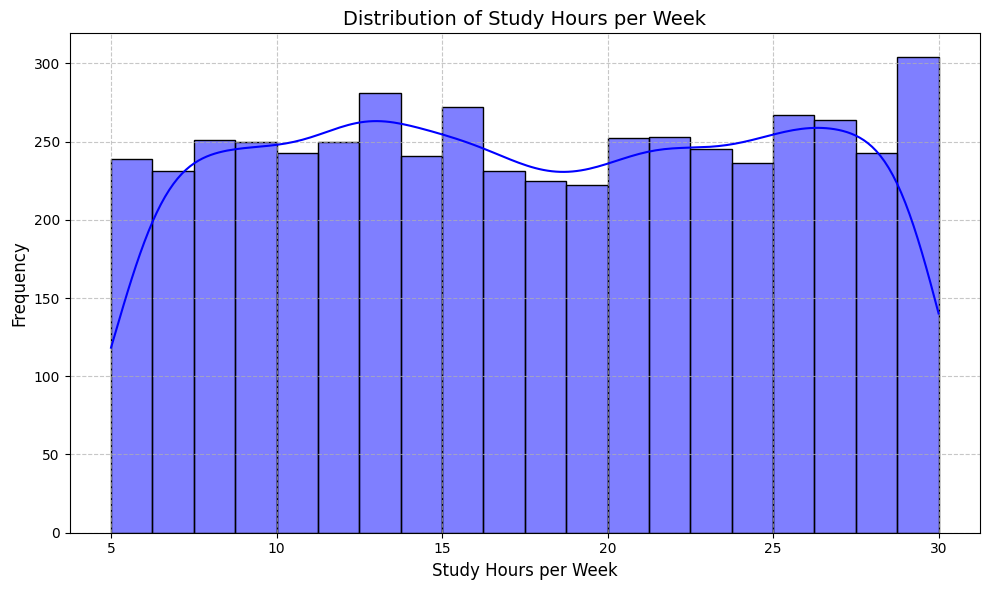

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Study_Hours_per_Week'], kde=True, bins=20, color='blue')
plt.title('Distribution of Study Hours per Week', fontsize=14)
plt.xlabel('Study Hours per Week', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Dữ liệu cho thấy học sinh/sinh viên có thói quen học tập rất đa dạng, tập trung chủ yếu ở ba nhóm: **10-15 giờ, 20-25 giờ, và 29 - 30 giờ mỗi tuần.**
- Nhóm học trên **25 - 30 giờ/tuần có phân bố đều nhất và có tần suất gần cao nhất**, cho thấy xu hướng sinh viên thường học từ 20 - 25h/ tuần -> trung bình khoảng 4h/ ngày.
- Có một số nhóm học có tần suất cao: **12h/ tuần, 16h/ tuần và 29h/ tuần**, tương đương với khoảng **1,7h/ ngày, 2h/ ngày và 4.5h/ ngày** -> cho thấy có lượng lớn nhóm sinh viên học ít hơn thời gian trung bình
- Và cũng có sinh viên vô cùng chăm học tận **29 - 30h/ tuần**, và đây là nhóm sinh viên lớn nhất có tới **hơn 300 / 5000** sinh viên

### Mối quan hệ giữa study_hours_per_week và các numeric features

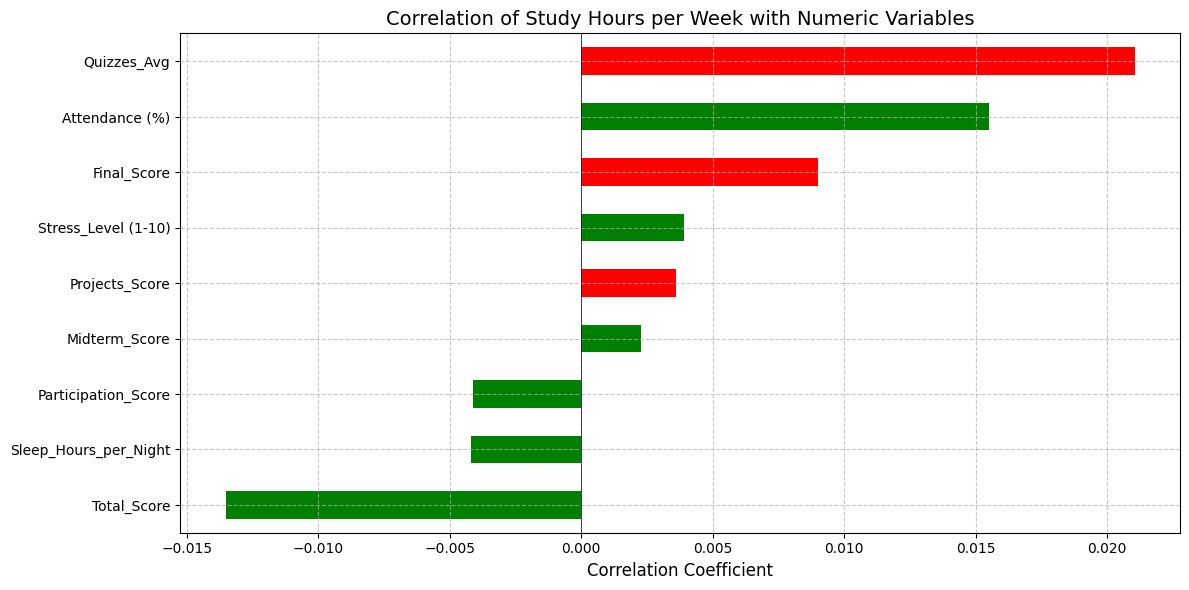

Attendance (%)           0.015496
Midterm_Score            0.002277
Final_Score              0.008987
Quizzes_Avg              0.021044
Participation_Score     -0.004128
Projects_Score           0.003605
Total_Score             -0.013520
Stress_Level (1-10)      0.003917
Sleep_Hours_per_Night   -0.004181
Name: Study_Hours_per_Week, dtype: float64

In [22]:
# Calculate correlations between Study_Hours_per_Week and numeric variables
numeric_vars = [
    'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Quizzes_Avg', 
    'Participation_Score', 'Projects_Score', 'Total_Score', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']

correlations_with_study = df[numeric_vars + ['Study_Hours_per_Week']].corr()['Study_Hours_per_Week'].drop('Study_Hours_per_Week')

# Visualize these correlations
plt.figure(figsize=(12, 6))
correlations_with_study.sort_values().plot(kind='barh', color=['red' if x < 0 else 'green' for x in correlations_with_study])
plt.title('Correlation of Study Hours per Week with Numeric Variables', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display correlations
correlations_with_study

**Nhật xét:**
- **study_hours_per_week** có tương quan dương mạnh nhất với **quizzes_avg 0 (0.021)**: Cho thấy rằng sinh viên học càng nhiều thường sẽ thuộc bài và nắm chắc kiến thức trên lớp hơn, điều đó làm cải thiện điểm quiz.
- **study_hours_per_week** có tương quan âm mạnh nhất với **total_score (-0.013)**: Cho thấy rằng sinh viên có xu hướng có nhiều thường sẽ có điểm tổng kết thấp hơn. Điều này hơi mâu thuẫn với tự nhiên, nhưng chỉ ra rằng sinh viên nên học với tới khoảng nhất định, học quá nhiều không đồng nghĩa việc điểm số cũng tăng thêm.
    - Ngưỡng học sẽ được tìm hiểu ở phần sau.
- **study_hours_per_week** còn có tương quan với:
    - **Attendance (0.015)**: sinh viên có giờ học nhiều thường là các sinh viên chăm học, chính vì vậy có xu hướng chăm học, điểm chuyên cần cao hơn.
    - **Stress_level (0.003)**: sinh viên học nhiều bị kiệt sức, hao tổn về sức khỏe, tinh thần, vì vậy áp lực nhiều hơn (áp lực điểm số).
    - **Final_score (0.008), Project score (0.003) và Midterm_score (0.002)**: tương tự như **quizzes**, học nhiều nắm vững kiến thức hơn, tuy nhiên độ tương quan không mạnh.
    - **Participation_score và Sleep_hours_per_night (-0.005)**: có tương quan âm, học nhiều làm sinh viên bị kiệt sức, nên điểm tham dự trên lớp bị kém hơn và học nhiều làm sinh viên ngủ ít hơn.

✅ Như vậy đã trả lời cho câu hỏi **"study_hours_per_week có ảnh hưởng tới các hệ số score như thế nào ?"** và **study_hours_per_week ảnh hưởng tới cuộc sống thể chất (Stress_level, Sleep_hours_per_night) như thế nào ?**.

### Tiếp theo, phân tích mối quan hệ giữa study_hours_per_week và các categorical features

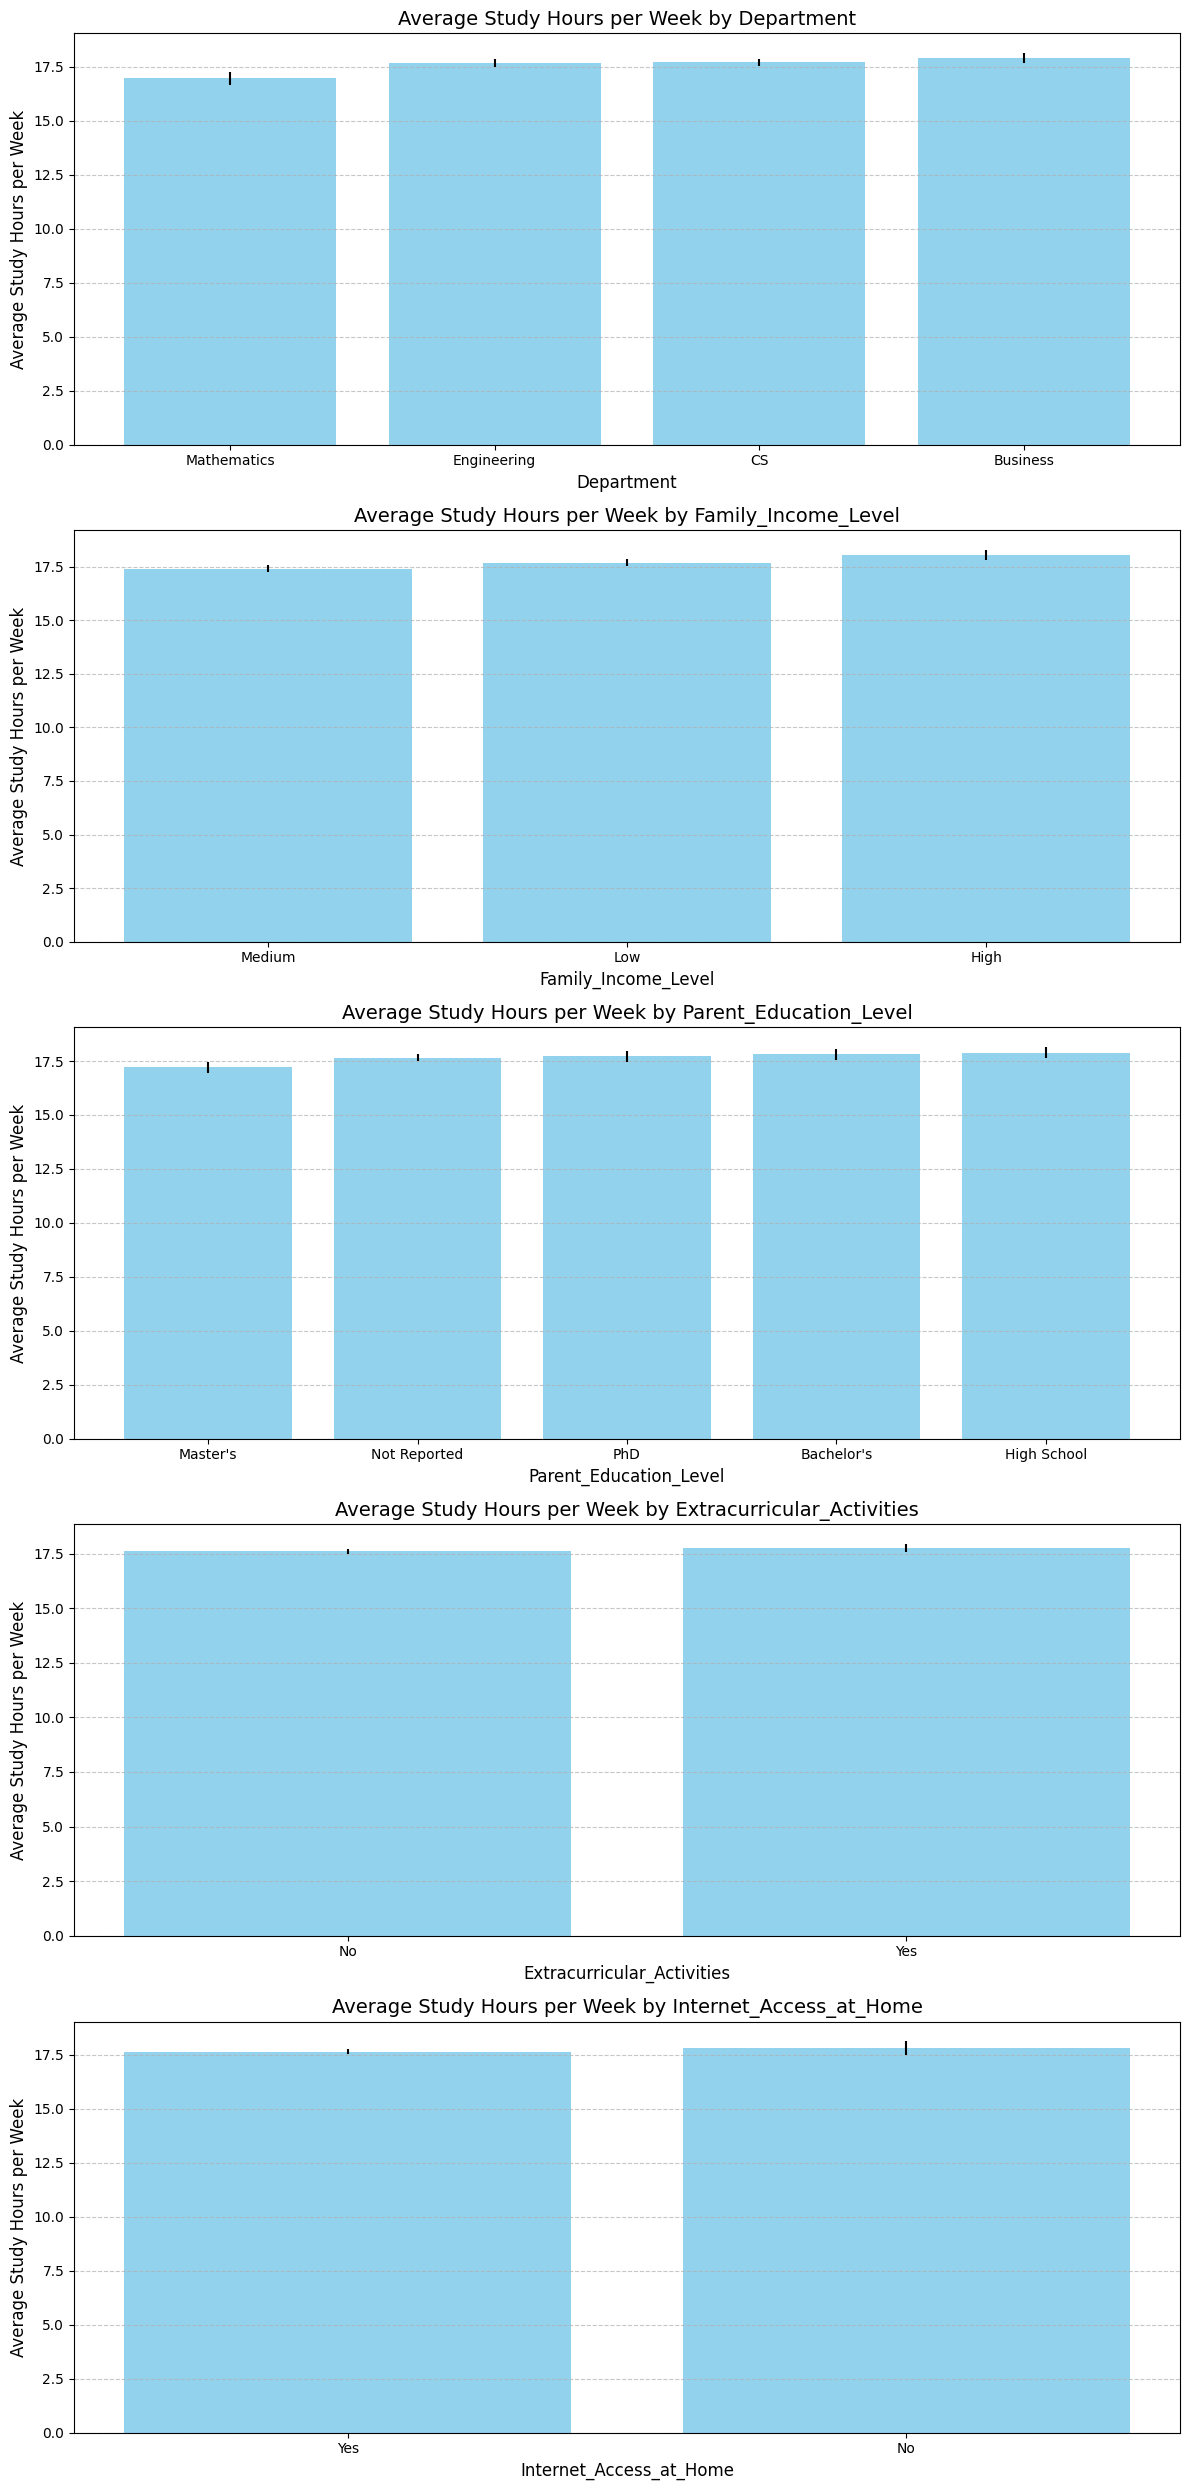

{'Department': Department
 Business       17.906461
 CS             17.703017
 Engineering    17.668550
 Mathematics    16.957853
 Name: Study_Hours_per_Week, dtype: float64,
 'Family_Income_Level': Family_Income_Level
 High      18.066188
 Low       17.691528
 Medium    17.410492
 Name: Study_Hours_per_Week, dtype: float64,
 'Parent_Education_Level': Parent_Education_Level
 Bachelor's      17.806173
 High School     17.887060
 Master's        17.212564
 Not Reported    17.659532
 PhD             17.714878
 Name: Study_Hours_per_Week, dtype: float64,
 'Extracurricular_Activities': Extracurricular_Activities
 No     17.617177
 Yes    17.755474
 Name: Study_Hours_per_Week, dtype: float64,
 'Internet_Access_at_Home': Internet_Access_at_Home
 No     17.806990
 Yes    17.641851
 Name: Study_Hours_per_Week, dtype: float64}

In [23]:
categorical_features = ['Department', 'Family_Income_Level', 'Parent_Education_Level', 
                   'Extracurricular_Activities', 'Internet_Access_at_Home']

# Create bar plots showing average Study_Hours_per_Week for each categorical variable
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(12, 25))

for i, cat_var in enumerate(categorical_features):
    avg_study_hours = df_cleaned.groupby(cat_var)['Study_Hours_per_Week'].mean().sort_values()
    std_errors = df_cleaned.groupby(cat_var)['Study_Hours_per_Week'].sem()
    
    # Create bar plot with error bars
    axes[i].bar(avg_study_hours.index, avg_study_hours.values, yerr=std_errors[avg_study_hours.index], color='skyblue', alpha=0.9)
    axes[i].set_title(f'Average Study Hours per Week by {cat_var}', fontsize=14)
    axes[i].set_xlabel(cat_var, fontsize=12)
    axes[i].set_ylabel('Average Study Hours per Week', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Summarize the average study hours by each category
study_hours_summary = {cat_var: df_cleaned.groupby(cat_var)['Study_Hours_per_Week'].mean() for cat_var in categorical_features}
study_hours_summary

- Theo **Department**:
    - **Business** có số giờ học trung bình cao nhất **(17.9 giờ / tuần)**.
    - **Mathematics** có số giờ học trung bình thấp nhất **(16.96 giờ / tuần)**.
    - **Engineering và Computer Science** có số giờ học trung bình và tương đương nhau **(~17.7 giờ / tuần)**.
    - Sinh viên của các ngành **Business, Engineering và Computer Science** có xu hướng học nhiều hơn, còn ngành **Mathematics** học ít nhất, có thể do chương trình ít yêu cầu hơn.
- Theo **Family_Income_Level**:
    - Sinh viên có **thu nhập gia đình cao** có giờ học trên tuần là cao nhất **(18.07 giờ / tuần)** có thể do điều kiện học tập tốt hơn.
    - Sinh viên có **thu nhập gia đình trung bình và thấp** có giờ học trên tuần không có khác biệt nhiều **(17.41 giờ / tuần và 17.41 giờ/ tuần)**
- Theo **Parent_Education_Level**:
    - Bố mẹ có trình độ **High School** cao nhất **(17.89 giờ/tuần)**, có thể do phụ huynh khuyến khích con cái học tập để cải thiện trình độ.
    - Bố mẹ có trình độ **Master’s** thấp nhất **(17.21 giờ/tuần)**, có thể do kỳ vọng khác biệt.
    - !!!Dữ liệu **Parent_Education_Level** chưa phản ánh thực tế do **Not_reported** còn nhiều.
- Theo **Extracurricular_Activities và Internet_Access_at_Home**:
    - Không có sự khác biệt quá nhiều giữa **Extracurricular_Activities (Yes: 17.76 giờ/ tuần; No: 17.62 giờ/ tuần)** và **Internet_Access_at_Home (Yes: 17.64 giờ/ tuần; No: 17.81 giờ/ tuần)**.
    - Sinh viên tham gia hoạt động ngoại khóa và có Internet ở nhà hay không không làm ảnh hưởng quá nhiều tới thời gian học trên tuần.

✅ Như vậy đã trả lời cho câu hỏi: **"Các sinh viên thuộc nhóm có yếu tố khách quan khác nhau như Department, Family_Income_Level, Parent_Education_Level, Extracurricular_Activities và Internet_Access_at_Home, ... có số giờ học trên tuần khác nhau như thế nào ?""**

### Phân tích mối quan hệ Total Score và Study_Hours_per_Week

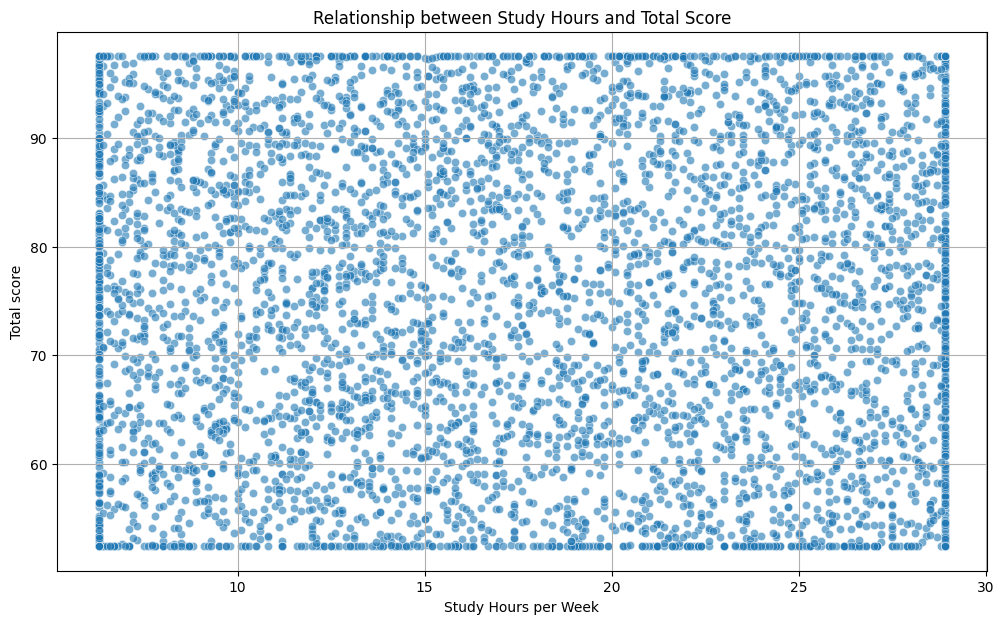

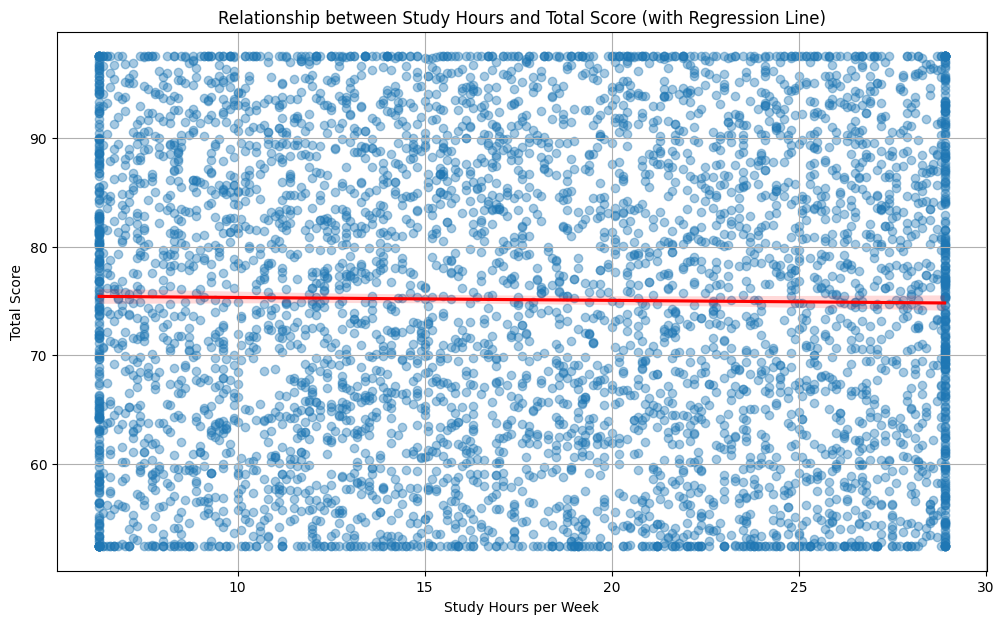

In [24]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Study_Hours_per_Week', y='Total_Score', data=df, alpha=0.6)
plt.title('Relationship between Study Hours and Total Score')
plt.xlabel('Study Hours per Week')
plt.ylabel('Total score')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 7))
sns.regplot(x='Study_Hours_per_Week', y='Total_Score', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relationship between Study Hours and Total Score (with Regression Line)')
plt.xlabel('Study Hours per Week')
plt.ylabel('Total Score')
plt.grid(True)
plt.show()

**Nhận xét**:
- Đồ thị trên là phân bố của **Study_Hours_per_Week** và **Total_Score** theo kiểu Scatter.
- **Regression line** nhìn thì có vẻ nằm ngang, để ý rất kỹ thấy nghiên nhẹ về phía bên phải.
- Để kiểm tra **Regression line** có bị nghiên hay không, dùng **Correlation**.

In [25]:
correlation = df['Study_Hours_per_Week'].corr(df['Total_Score'])
print(f"\nCorrelation between Study hours per week and Total score: {correlation:.4f}")


Correlation between Study hours per week and Total score: -0.0135


Vậy là **correlation = -0.0135 (< 0)**, vậy thì có thể đưa ra kết luận học nhiều sẽ bị điểm thấp.

### Phân tích Study_Hours_per_week của từng nhóm điểm

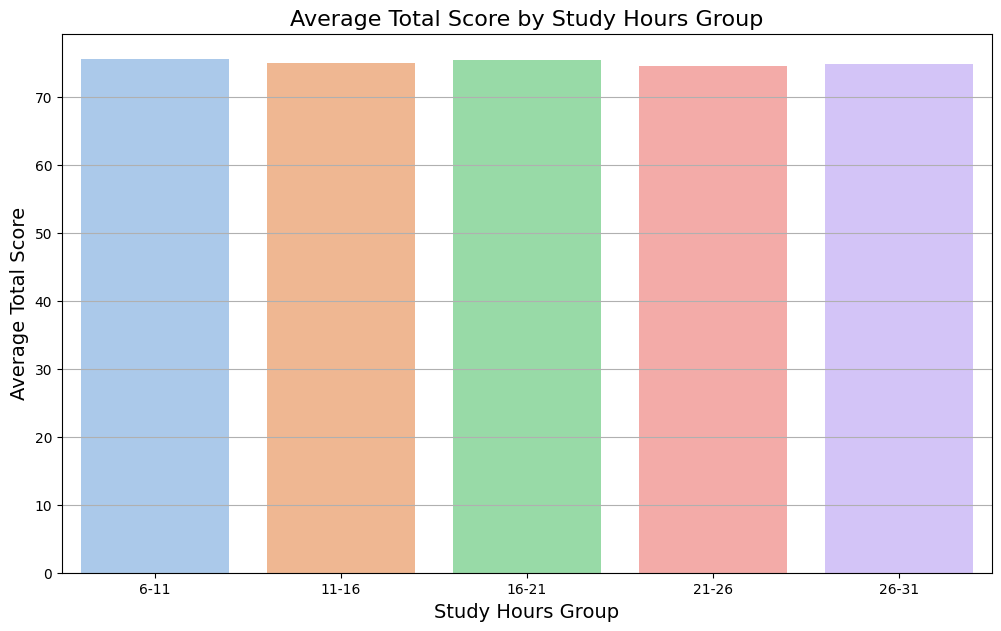

Average Total Score by Study Hours Group:
  Study_Hours_Group  Total_Score
0              6-11    75.549113
1             11-16    74.945032
2             16-21    75.489407
3             21-26    74.634226
4             26-31    74.933452


In [26]:
min_hours = int(df['Study_Hours_per_Week'].min())
max_hours = int(df['Study_Hours_per_Week'].max())
bins = np.arange(min_hours, max_hours + 5, 5)
labels = [f'{i}-{i+5}' for i in bins[:-1]]

df['Study_Hours_Group'] = pd.cut(df['Study_Hours_per_Week'], bins=bins, labels=labels, right=False)

avg_score_by_study_hours = df.groupby('Study_Hours_Group')['Total_Score'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Study_Hours_Group', y='Total_Score', data=avg_score_by_study_hours, palette='pastel')
plt.title('Average Total Score by Study Hours Group', fontsize=16)
plt.xlabel('Study Hours Group', fontsize=14)
plt.ylabel('Average Total Score', fontsize=14)
plt.grid(axis='y')
plt.show()

print("Average Total Score by Study Hours Group:")
print(avg_score_by_study_hours)

**Nhận xét**
- Không có sự khác biệt lớn về điểm trung bình giữa các nhóm giờ học.
- Group **6-11 giờ/tuần** có **tổng điểm trung bình cao nhất**. Điều này khá bất ngờ và có thể đi ngược lại với giả định thông thường rằng học nhiều hơn sẽ dẫn đến điểm cao hơn.

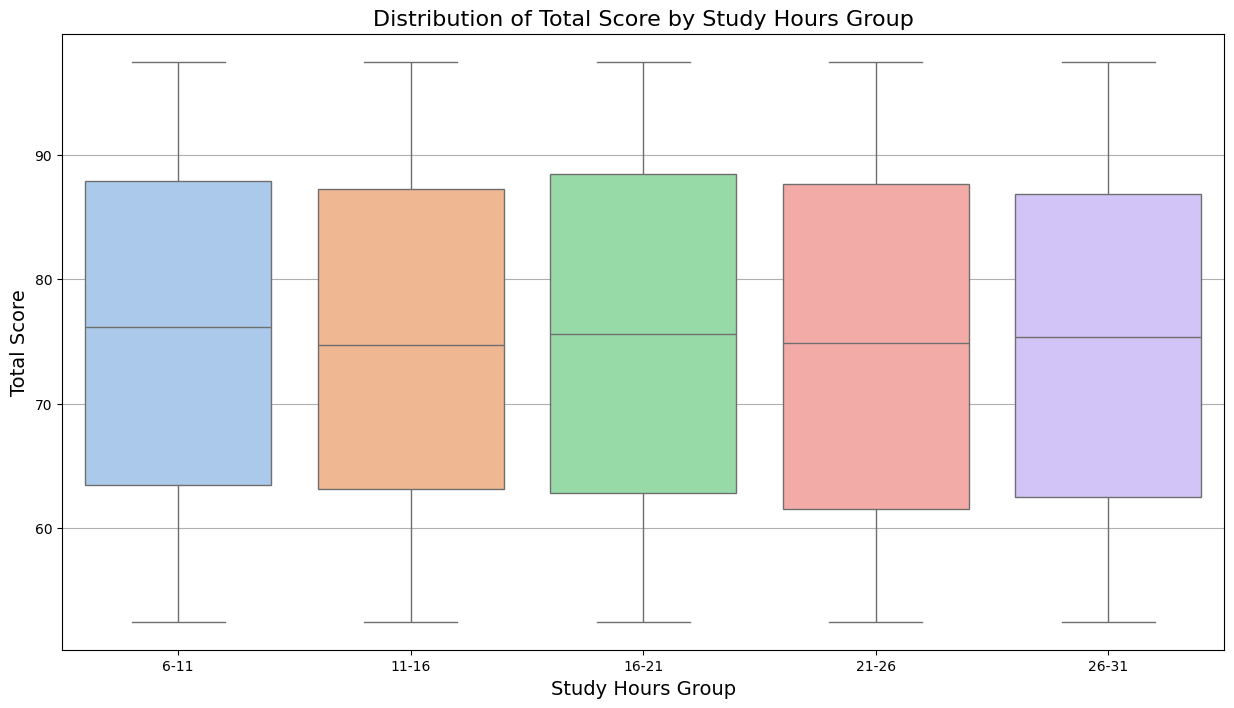

In [27]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Study_Hours_Group', y='Total_Score', data=df, palette='pastel')
plt.title('Distribution of Total Score by Study Hours Group', fontsize=16)
plt.xlabel('Study Hours Group', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.grid(axis='y')
plt.show()

Sau khi phân tích kỹ hơn về phân phối của từng nhóm Study_Hours_per_week, có **kết luận** sau:
- Nhóm học từ **16 - 21 giờ / tuần** có kết quả tốt hơn chút so với các nhóm còn lại, bởi giá trị **max** cao hơn chút mà vẫn giữ được giá trị **mean** tương đối giống với các nhóm khác.
- Sự phân phối của **Total_Score** theo từng nhóm **Study_Hours_per_Week** là không có sự khác biệt quá nhiều cả về **Min, Max, Mean, IQR**.
- **Số giờ học không phải là yếu tố quyết định chính đến tổng điểm**: Có thể các yếu tố khác như chất lượng giờ học, phương pháp học tập, mức độ tập trung, kiến thức nền tảng có ảnh hưởng lớn hơn đến điểm số.

✅ Như vậy đã trả lời cho câu hỏi **"Sinh viên nên học trong khoảng bao nhiêu giờ / tuần để đạt được kết quả cao ?**. Đó là **Số giờ học không quyết định đến tổng điểm**, có sinh viên học ít (6 - 11 tiếng / tuần) đạt được kết quả cao, tuy nhiên nên học trong **16 - 21 giờ / tuần** để đạt được kết quả cao nhất.